**Email :  tanvir2024islam@gmail.com**


Lode CSV file and import important libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("final-employee-ds.csv")
df.head(5)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3
3,104,Employee_4,42,Male,Marketing,12,60056.0,48,76,2012-10-12,M,2,25,4
4,105,Employee_5,40,Female,Finance,19,85543.0,36,97,2014-12-30,XL,8,3,4


**Question : 1**

In [16]:
TrainingHours = df['TrainingHours'].astype(float)

TrainingHours

,TrainingHours
0,4.0
1,18.0
2,13.0
3,25.0
4,3.0
...,...
95,25.0
96,12.0
97,39.0
98,17.0


In [17]:
Find_mean = np.mean(TrainingHours)

Find_standard_deviation = np.std(TrainingHours)

print(f"Mean : {Find_mean}")
print(f"Standard Deviation : {Find_standard_deviation}")


Mean : 24.19
Standard Deviation : 13.842467265628628


**Question : 2**

In [40]:
df['Salary'] = df.groupby('Department')['Salary'].transform(lambda x: x.fillna(x.median()))


filter_Salary = df[(df['ExperienceYears'] > 12) & (df['ProjectCount'] > 5) ]

total_salary = filter_Salary['Salary'].sum()

print('Total salary : ',total_salary )

Total salary :  1985775.5


**Question : 3**

In [46]:
Filter_employees = df[
    (df['Department'].isin(['IT','Finance'])) &
    (df['Age'] >= 30 & (df['Age'] <= 45)) &
    (df['PerformanceScore'] > 88)
]

Sort_employees = Filter_employees.sort_values(by='Salary', ascending=False)[['Name', 'Department', 'Salary', 'PerformanceScore']]

print(Sort_employees)

           Name Department    Salary  PerformanceScore
94  Employee_95         IT  140386.0                94
88  Employee_89    Finance  126027.0                92
13  Employee_14    Finance  113666.0                96
83  Employee_84         IT  109449.0                96
53  Employee_54         IT  100160.0                96
4    Employee_5    Finance   85543.0                97
32  Employee_33         IT   83919.0                98
54  Employee_55         IT   81975.0                95
48  Employee_49         IT   80158.0                91
55  Employee_56    Finance   49540.0                94


**Question : 4**

In [57]:
df['SalaryPerHour'] = df['Salary'] / (df['WorkHoursPerWeek'] * 4)

top_5 = df.sort_values(by='SalaryPerHour', ascending=False).head(5)[['Name', 'SalaryPerHour']]

print(top_5)

           Name  SalaryPerHour
46  Employee_47     981.278571
27  Employee_28     971.292857
31  Employee_32     967.392857
79  Employee_80     945.335526
80  Employee_81     937.858974


**Question : 5**

In [63]:
dept_gender = df.groupby(['Department', 'Gender']).size().unstack(fill_value=0)

print(dept_gender)

Gender      Female  Male
Department              
Finance         11     5
HR               7    16
IT              11    16
Management       2     8
Marketing       13    11


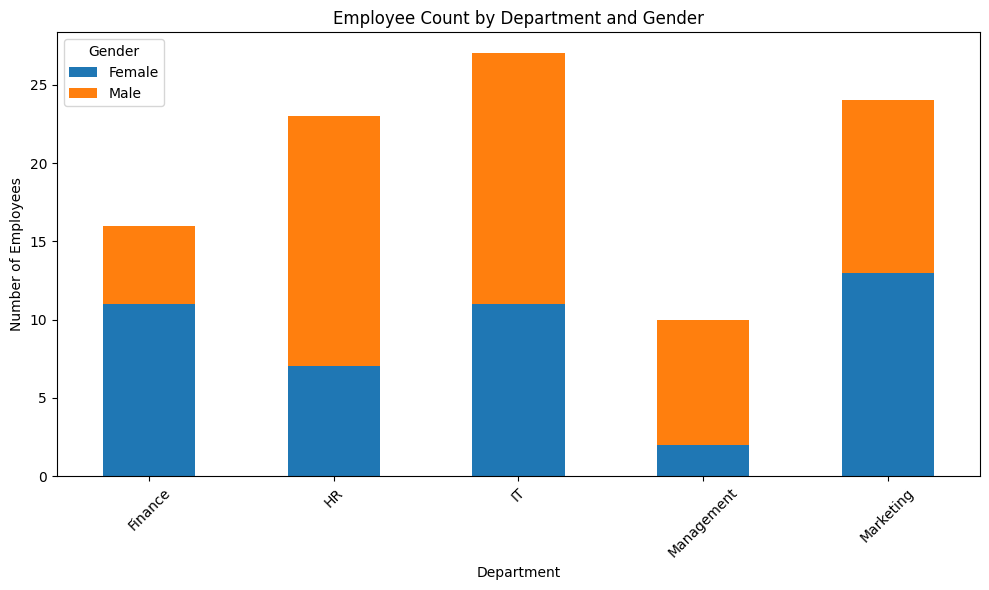

In [64]:
dept_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Employee Count by Department and Gender')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()